# PUNTO 4 - JUAN CAMILO VERGARA

Se tiene un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno de inversión.

-	El conjunto de datos “publicidad.csv” consta de 200 observaciones y 4 variables que representan los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades) de un producto en un mercado específico: - TV: Gasto en publicidad en televisión. - Radio: Gasto en publicidad en radio. - Newspaper: Gasto en publicidad en periódicos. - Sales: Número de unidades vendidas (en miles)

-	Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.

-	Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor represente estas correlaciones. ¿Interprete las estructuras de dependencia encontradas?

-	Teniedo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o “Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente de determinación R2? ¿Cómo se interpreta este valor?

-	Realiza una predicción del retorno de inversión esperado cuando se realizan 5 anuncios por el canal de la variable escogida en el ítem anterior. ¿Cuál es el intervalo de confianza del 95 % para la predicción?


In [1]:
import pandas as pd   ## Libreria para manipular y analizar datos
import matplotlib.pyplot as plt  ## Libreria para visualizar
import seaborn as sns   ## Libreria para visualizar
import numpy as np  ## Libreria para operaciones numéricas
import plotly  ## Libreria para visualizaciones interactivas
import matplotlib.ticker as mtick  ## función para formatear en visualizaciones
from scipy.stats import skew, kurtosis  ## funciones estadísticas
from scipy.stats import norm ## distribución normal
from scipy.stats import poisson ## distribución Poisson
from scipy.stats import t ## distribución t
from scipy.stats import f ## distribución F
from scipy.stats import ttest_1samp  ## Prueba t una población
from scipy.stats import ttest_ind ## Prueba t comparación medias
from scipy.stats import shapiro ## Prueba normalidad Shapiro-Wilks
from scipy.stats import anderson ## Prueba normalidad Anderson-Darling
from scipy.stats import levene ## Prueba homogeneidad de varianzas Levene
from scipy.stats import mannwhitneyu ## Prueba Mann-Whitney-Wilcoxon (comparación dos poblaciones)
from scipy.stats import f_oneway ## Prueba ANOVA de una vía
from scipy.stats import chi2_contingency ## Prueba chi cuadrado de Pearson
from scipy.stats import pearsonr ## Coeficiente de correlación de Pearson con prueba
import statsmodels.stats as sm  ## estadísticas
import statsmodels.api as sm1  ## estadísticas
from statsmodels.graphics.gofplots import qqplot ## Gráfico QQ plot
import pingouin as pg ## Librería funciones estadísticas

/Users/juancamilovergaraarenas/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Primer punto
-	El conjunto de datos “publicidad.csv” consta de 200 observaciones y 4 variables que representan los gastos en publicidad (en miles de dólares) y las ventas (en miles de unidades) de un producto en un mercado específico: - TV: Gasto en publicidad en televisión. - Radio: Gasto en publicidad en radio. - Newspaper: Gasto en publicidad en periódicos. - Sales: Número de unidades vendidas (en miles)

Solo visualizar la información

In [2]:
ruta_archivo = "datasets/publicidad.csv"
data_publicidad = pd.read_csv(ruta_archivo)
data_publicidad = data_publicidad.rename(columns={"Unnamed: 0": "Índice"})
data_publicidad = data_publicidad.drop(columns={"Índice"})
data_publicidad

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
data_publicidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


De esta reviaión general de la información. Se puede decir que esta información consta de variables cuantitativas continuas, tipo float. Que no hay datos nulos, en su totalidad está completa 

# Punto 2
Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra variable respuesta es “Sales”.

array([[<Axes: xlabel='TV', ylabel='TV'>,
        <Axes: xlabel='Radio', ylabel='TV'>,
        <Axes: xlabel='Newspaper', ylabel='TV'>,
        <Axes: xlabel='Sales', ylabel='TV'>],
       [<Axes: xlabel='TV', ylabel='Radio'>,
        <Axes: xlabel='Radio', ylabel='Radio'>,
        <Axes: xlabel='Newspaper', ylabel='Radio'>,
        <Axes: xlabel='Sales', ylabel='Radio'>],
       [<Axes: xlabel='TV', ylabel='Newspaper'>,
        <Axes: xlabel='Radio', ylabel='Newspaper'>,
        <Axes: xlabel='Newspaper', ylabel='Newspaper'>,
        <Axes: xlabel='Sales', ylabel='Newspaper'>],
       [<Axes: xlabel='TV', ylabel='Sales'>,
        <Axes: xlabel='Radio', ylabel='Sales'>,
        <Axes: xlabel='Newspaper', ylabel='Sales'>,
        <Axes: xlabel='Sales', ylabel='Sales'>]], dtype=object)

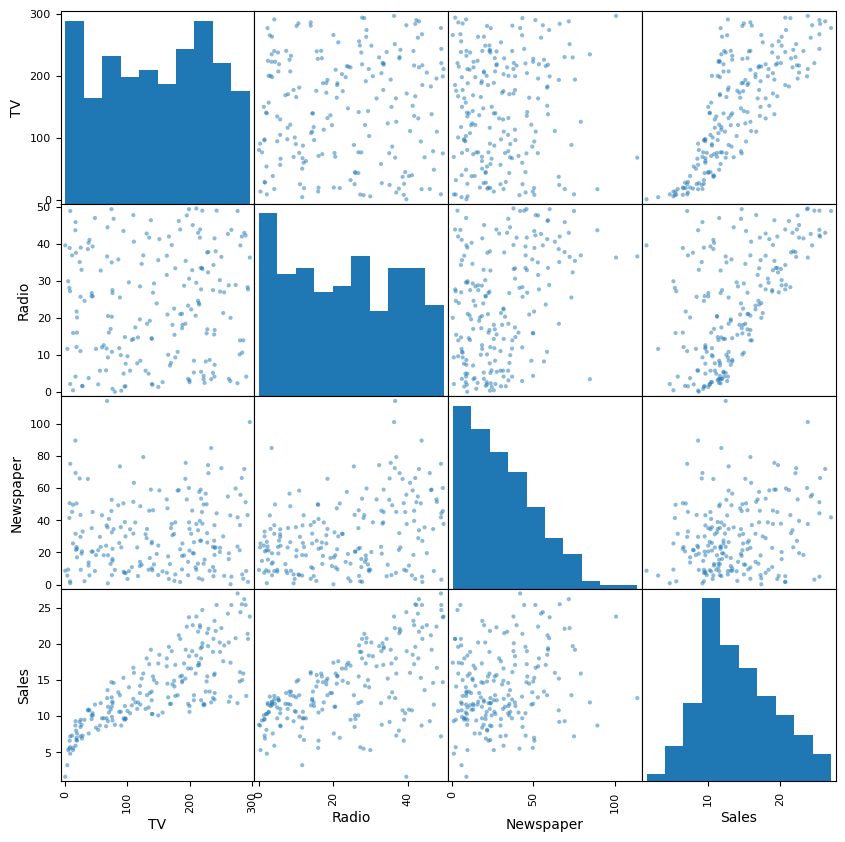

In [4]:
pd.plotting.scatter_matrix(data_publicidad, figsize=(10, 10))

Se puede analizar lo siguiente:

Análisis entre variables Y con X

1. Sales vs TV
Al observar el gráfico de dispersión entre las unidades vendidas y el gasto en miles de dolares en Televisión, se puede observar una relación significativa entre las dos variables. No podría decir aún con exactitud que tipo de  
relación tienen, si lineal u otra, pareciera ser una relación potencial o logaritmica porque arranca inicialmente con un gran crecimiento que luego va mostrando una tendencia de crecimiento lineal

2. Sales vs Radio
Al observar el gráfico de dispersión entre las unidades vendidas y el gasto en miles de dolares en radio, se puede observar una relación entre ambas variables, sin embargo con una mayor dispersión, es decir me hace pensar que tendría una menor correlación que el gasto en TV analizado anteriormente. En este caso si pensaría que se trata de una figura más eliptica que indicaría una relación lineal

3. Sales vs Newspaper
Al observar el gráfico de dispersión entre las unidades vendidas y el gasto en miles de dolares en Periódico se observa una mayor dispersión de los datos y eso indicaría menor correlación entre estas variables. Me hace pensar que la correlación más fuerte vendría a estar en las variables de gasto de publicidad en miles de dolares en TV y en Radio

Adicional a lo anterior también se puede ver la dependencia de las variables explicativas X entre ellas. Por ejemplo:

Análisis entre variables X con X

4. TV vs Radio
No se observa ninguna dependencia de estas variables, la una con la otra. los datos se encuentran totalmente dispersos y esto me hace pensar que no habría problemas de multicolinealidad entre ellas para un futuro modelo de regresión

5. TV vs Newspaper
No se observa tampoco ninguna dependencia entre estas variables. Los datos se encuentran totalmente dispersos y esto me hace pensar que tampoco se deberían de presentar problemas de multicolinealidad entre estas variables en caso de formar parte de un modelo de regresión

6. Radio vs Newspaper
No se observa tampoco ninguna dependencia entre estas variables. Los datos se encuentran totalmente dispersos y esto me hace pensar que tampoco se deberían de presentar problemas de multicolinealidad entre estas variables en caso de formar parte de un modelo de regresión

Finalmente, se puede analizar la distribución de los datos de cada uno en los histogramas de la diagonal

De esto se puede observar que la variable Y de unidades vendidas sigue una distribución aparentemente normal, con un leve sesgo negativo.

Las variables X de Gasto en miles de dolares en publicidad TQ y Radio no presentan una aparente distribución de los datos 

y la variable X de Gasto en miles de dolares en Newspaper aparenta presentar una distribución F de los datos 

In [5]:
def tabla_descriptivas(columnas: list):
  tabla_descriptivas=pd.DataFrame(columnas.describe())
  tabla_descriptivas.loc['coef. variation']=columnas.std()/columnas.mean()
  tabla_descriptivas.loc['skew']=skew(columnas)
  tabla_descriptivas.loc['kurtosis']=kurtosis(columnas)
  tabla_descriptivas.loc['mediana']=columnas.median()

  # Fix the indentation for the loop
  for columna in columnas:
      tabla_descriptivas.loc['coef. variation', columna] = data_publicidad[columna].std() / data_publicidad[columna].mean()
      tabla_descriptivas.loc['skew', columna] = skew(data_publicidad[columna])
      tabla_descriptivas.loc['kurtosis', columna] = kurtosis(data_publicidad[columna])
      tabla_descriptivas.loc['mediana']=columnas.median()
  return tabla_descriptivas

tabla_descriptivas(data_publicidad[['TV', 'Radio', 'Newspaper', 'Sales']])

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000
coef. variation,0.583874,0.638188,0.712791,0.372077
skew,-0.069328,0.093467,0.887996,0.404508


Adicional a lo anterior, Se puede observar la siguiente información:

- La media y la mediana no son muy diferentes, eso hace pensar que los datos no se encuentran tan sesgados
- La kurtosis de todos los valores no es tan grande, lo que puede significar una baja dispersión de los datos. Sin embargo para TV, Radio y Ventas se observa una kurtosis negativa que indica que la distribución de los datos tiene a estar más aplanada, en cambio en el Periódico se muestra una distribución más alargada en su centro.
- El skew mide el grado de asimetría de los datos. En este caso para el Radio, Periódico y ventas se presenta unos valores positivos que indican distribución sesgada hacia la izquierda y el valor negativo de TV indica lo contrario, un sesgo hacia la derecha
- El coeficiente de variación de cada variable, vista independientemente, indica que tan dispersos se encuentran los datos con respecto a su punto central. En este caso se observa que en general todas las variables tienen una dispersión alta

# Punto 3
Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor represente estas correlaciones. ¿Interprete las estructuras de dependencia encontradas?

In [6]:
data_publicidad.corr(method = "pearson")

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


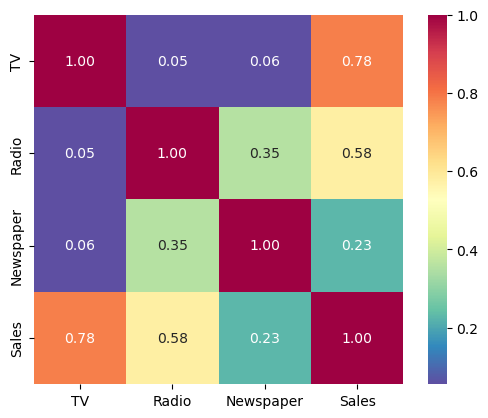

In [7]:
corrmat = data_publicidad.corr(method = "pearson")
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data_publicidad.columns, 
                 xticklabels=data_publicidad.columns, 
                 cmap="Spectral_r")
plt.show()

In [8]:
data_publicidad.corr(method = "spearman")

,TV,Radio,Newspaper,Sales
TV,1.000000,0.056123,0.050840,0.800614
Radio,0.056123,1.000000,0.316979,0.554304
Newspaper,0.050840,0.316979,1.000000,0.194922
Sales,0.800614,0.554304,0.194922,1.000000


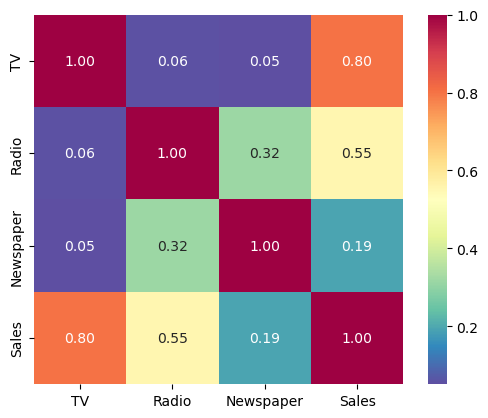

In [9]:
corrmat = data_publicidad.corr(method = "spearman")
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data_publicidad.columns, 
                 xticklabels=data_publicidad.columns, 
                 cmap="Spectral_r")
plt.show()

En primer lugar es importante decir que se utilizó dos tipos de correlaciones: una Pearson o una Spearman. Entendiendo que Pearson unicamente describe correlación de manera efectiva si se trata de una relación lineal entre las variables. Mientras que Spearman puede indicar una relación entre las variables que no necesariamente es lineal.

Cada uno tiene sus valores de correlaciones entre variables y graficamente un diagrama de calor que indica una correlación fuerte para colores entre Naranja y Rojo que va desde el 0.75 al 1. y una correlación moderada en el color amarillo. El resto de colores ya indican baja o cero correlación.

En este caso puntual tanto para Pearson como Spearman se detecta una correlación fuerte entre la variable explciativa "X" de gasto de publicidad en miles de dolares en TV con la variable "Y" de unidades vendidas
Luego le sigue con una correlación moderada entre la variable explicativa "X" de gasto de publicidad en miles de dolares en Radio y la variable "Y" en unidades vendidas.

El resto de variables realmente no presentan ninguna correlación con la variable "Y"

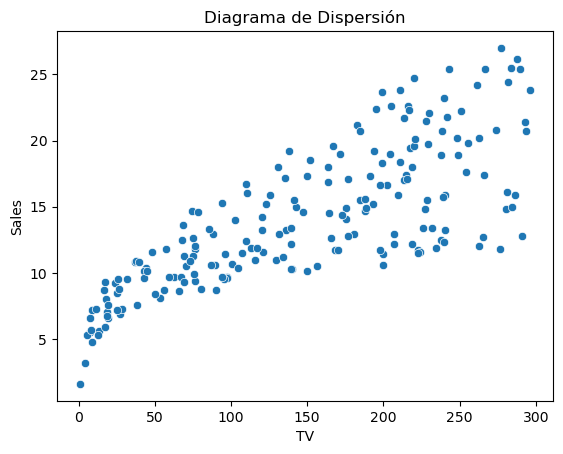

In [10]:
# Graficar el diagrama de dispersión con Seaborn
sns.scatterplot(x='TV', y='Sales', data=data_publicidad)

# Añadir título
plt.title('Diagrama de Dispersión')

# Mostrar el gráfico
plt.show()

# Punto 4
Teniedo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o “Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente de determinación R2? ¿Cómo se interpreta este valor?

In [11]:
import statsmodels.api as sm

data_modelo = data_publicidad.drop(columns={"Radio", "Newspaper"})

X = sm.add_constant(data_modelo.drop("Sales", axis = 1))
y = data_modelo[["Sales"]]

model = sm.OLS(y, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        20:50:44   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

Con este modelo de regresión se obtiene un R2 ajustado de 0.61. Esto significa que aproximadamente el 61% de variabilidad en las unidades vendidas (variable y) se puede explicar por el gasto de publicidad en TV (variable x)

Adicional se puede observar que el valor P es menor que 0.05 y por ello se puede concluir que el modelo es estadísticamente significativo.
Adicional el valor P de la variable TV es menor a 0.05

# Prueba de Independencia

- Ho = Los Ei son independientes --> que significa que la correlación de un Ei con un Ei+1 es igual a cero (O sea que no hay autocorrelación)
- Ha = La correlación de un Ei con un Ei+1 NO es igual a cero 

Estadística de Durbin-Watson: 1.93468853728236


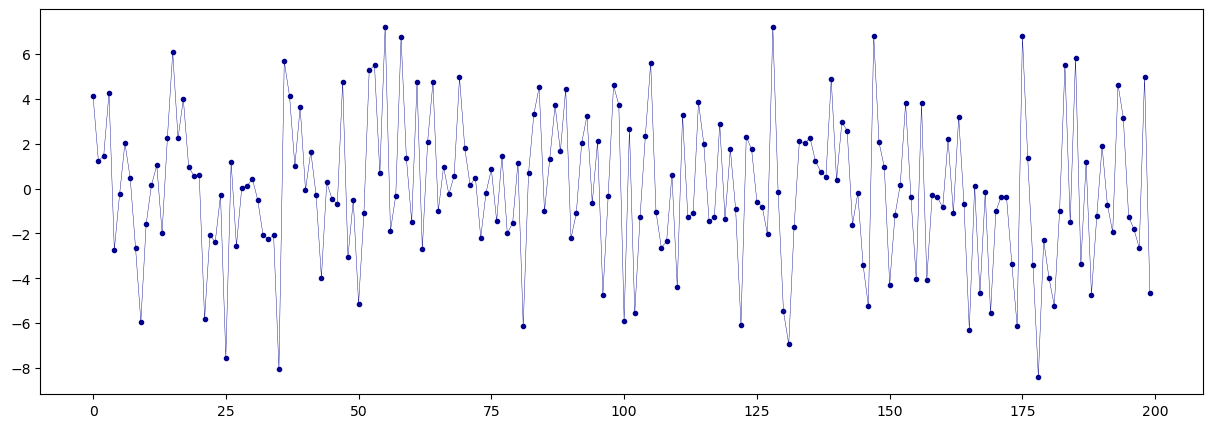

In [20]:
"""Prueba de Independencia"""

# Añadir una constante a la matriz de predictores para ajustar el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Calcular los residuos del modelo
resid = model.resid

# Calcular la estadística de Durbin-Watson
durbin_watson_statistic = sm.stats.stattools.durbin_watson(resid)

# Imprimir el valor de la estadística Durbin-Watson
print("Estadística de Durbin-Watson:", durbin_watson_statistic)

# Realizar una prueba de hipótesis para determinar la significancia
alpha = 0.05

# Calcular el valor p para la prueba de Durbin-Watson
dw_test_p_value = sm.stats.durbin_watson(resid, axis=0)


plt.figure(figsize=(15,5))
plt.plot(model.resid, '.-', color ="darkblue", linewidth=0.3)
plt.show()

Como el estadístico de durbin watson está entre 1.5 y 2.5, entonces no habría evidencia suficiente para rechazar la Ho, por lo que se cumple el supuesto de independencia. Adicional, gráficamente también se puede observar que el comportamiento de los residuos es completamente aleatorio y no marca ninguna tendencia. 

# Prueba de Normalidad

- Ho = Ei sigue comportamiento normal
- Ha = Ei NO sigue comportamiento normal

In [21]:
"""Prueba de Normalidad"""
from scipy import stats

shapiro_test_statistic, shapiro_p_value = stats.shapiro(model.resid)
print("Estadístico de prueba para Shapiro Wilks: ", shapiro_test_statistic)
print("P-Value: ", shapiro_p_value)



Estadístico de prueba para Shapiro Wilks:  0.9905306696891785
P-Value:  0.21332456171512604


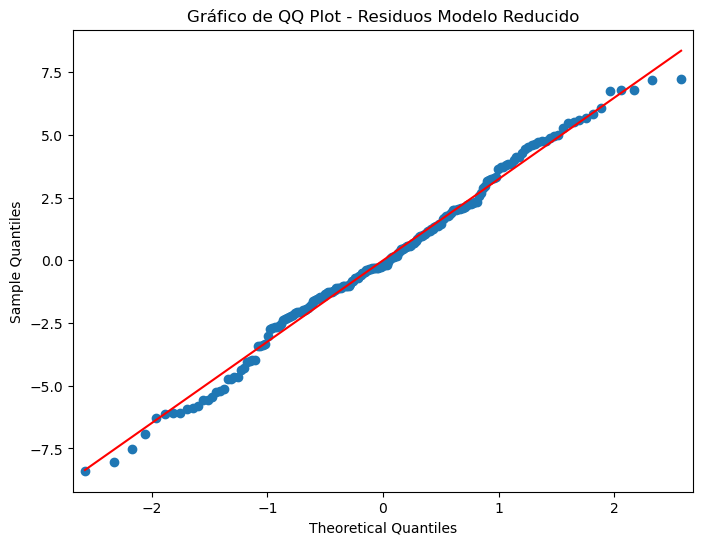

In [14]:
# Gráfico QQ Plot 

fig, ax = plt.subplots(figsize=(8, 6))
qqplot(model.resid, line='s', ax=ax)
ax.set_title('Gráfico de QQ Plot - Residuos Modelo Reducido')
plt.show()

Conclusión: Como el valor p es mayor que alpha (0.05), entonces no hay evidencia suficiente para rechazar Ho, por lo que el comportamiento sigue una distribución normal y se cumple el supuesto de normalidad. Adicionalmente, al realizar el gráfico QQ Plot se puede observar que estos siguen una linea recta lo que también implica que se cumple el supuesto de normalidad

# Prueba Media Cero

- Ho = el valor esperado de los Ei es igual a cero (promedio igual a cero)
- Ha = el valor esperado de los Ei NO es igual a cero (promedio NO igual a cero)

In [22]:
"""Prueba media cero"""

# Prueba de One Sample T-Test

t_statistic, p_value = stats.ttest_1samp(model.resid, 0)


print("Estadístico t:", t_statistic)
print("P-Value:", p_value)



Estadístico t: -1.901234536356806e-14
P-Value: 0.9999999999999849


Conclusión: Como el valor p es mayor que alpha (0.05), entonces no hay evidencia suficiente para rechazar Ho, por lo que el promedio entonces es igual a cero y se cumple el supuesto de media cero. El gráfico de los residuos presentado arriba también aplica para este supuesto e indica que los residuos siguen un comportamiento aleatorio al rededor del cero lo que también indica que se cumple este supuesto

# Prueba de Homocedasticidad

- Ho = Varianzas de Ei constante
- Ha = Varianzas de Ei NO constante

Estadístico de prueba de Breusch-Pagan: 48.037965662293594
P-Value: 4.180455907755742e-12


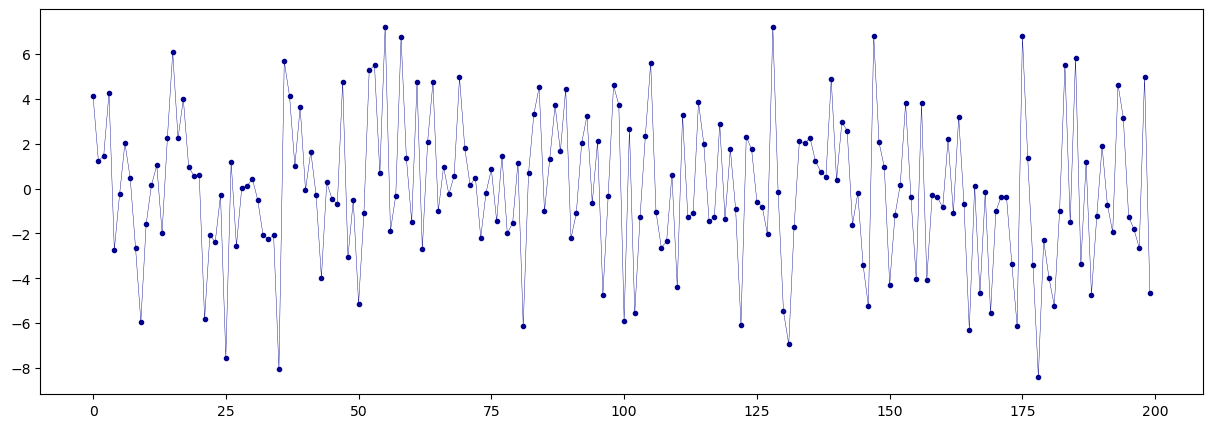

In [23]:
bp_test = sm.stats.diagnostic.het_breuschpagan(model.resid, model.model.exog)
print("Estadístico de prueba de Breusch-Pagan:", bp_test[0])
print("P-Value:", bp_test[1])

plt.figure(figsize=(15,5))
plt.plot(model.resid, '.-', color ="darkblue", linewidth=0.3)
plt.show()

Conclusión: En la prueba de homocedasticidad, el valor P es menor que el aplha (0.05). lo que indica que se rechaza Ho y por lo tanto hay evidencia suficiente para decir que las varianzas no son constantes. Esto también se puede evidenciar porque el coeficiente de variación de todas las variables era muy alto al momento de hacer el analisis exploratorio de los datos, en la primera sección del ejercicio.

Por este motivo se propone realizar un modelo robusto que permita penalizar las varianzas y de esta manera forzar la homocedasticidad

In [26]:
import statsmodels.api as sm

data_modelo = data_publicidad.drop(columns={"Radio", "Newspaper"})

X = sm.add_constant(data_modelo.drop("Sales", axis = 1))
y = data_modelo[["Sales"]]

model = sm.OLS(y, X)
result = model.fit()

print("Modelo Ajustado")

print(result.summary())

rlm_model = sm.RLM(y, X)

rlm_results = rlm_model.fit()

print("Modelo Robusto")

rlm_results.summary()

Modelo Ajustado
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        22:21:02   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458    

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  200
Model:                            RLM   Df Residuals:                      198
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 11 Apr 2024                                         
Time:                        22:21:02                                         
No. Iterations:                    23                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8843      0.484     14.235      0.000       5.936       7.832
TV             0.0491      0.003     17.278      0.000       0.044       0.055
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

De esta manera entonces se obtiene un modelo con la siguiente función:

Y(unidades vendidas) = 6.8843 + 0.0491X(Gasto en miles de dolares)

# Punto 5
Realiza una predicción del retorno de inversión esperado cuando se realizan 5 anuncios por el canal de la variable escogida en el ítem anterior. ¿Cuál es el intervalo de confianza del 95 % para la predicción?

In [29]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [51]:
import statsmodels.api as sm

data_modelo = data_publicidad.drop(columns={"Newspaper"})

X = sm.add_constant(data_modelo.drop("Sales", axis = 1))
y = data_modelo[["Sales"]]

model = sm.OLS(y, X)
result = model.fit()

print("Modelo Ajustado")

print(result.summary())

Modelo Ajustado
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           4.83e-98
Time:                        16:47:56   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294    

In [32]:
import statsmodels.api as sm

data_modelo = data_publicidad.drop(columns={"Radio", "Newspaper"})

X = sm.add_constant(data_modelo.drop("Sales", axis = 1))
y = data_modelo[["Sales"]]

model = sm.OLS(y, X)
result = model.fit()

print("Modelo Ajustado")

print(result.summary())

rlm_model = sm.RLM(y, X)

rlm_results = rlm_model.fit()

print("Modelo Robusto")

rlm_results.summary()

Modelo Ajustado
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 13 Apr 2024   Prob (F-statistic):           1.47e-42
Time:                        14:33:28   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458    

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  200
Model:                            RLM   Df Residuals:                      198
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 13 Apr 2024                                         
Time:                        14:33:28                                         
No. Iterations:                    23                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8843      0.484     14.235      0.000       5.936       7.832
TV             0.0491      0.003     17.278      0.000       0.044       0.055
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

Con este modelo robusto, entonces tenemos la función para predecir Y:
- Y(unidades vendidas) = 6.8843 + 0.0491X(Gasto en miles de dolares)

Pero además las funciones para los intervalos:

- Valor mínimo = Y(unidades vendidas) = 5.936 + 0.044X(Gasto en miles de dolares)
- Valor máximo = Y(unidades vendidas) = 7.832 + 0.055X(Gasto en miles de dolares)


In [54]:
data_publicidad[["TV", "Sales"]]


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [57]:
muestra_random = data_publicidad[["TV", "Sales"]].sample(5)

# Print the randomly selected 5 rows
print("selección aleatoria de 5 datos:")
print(muestra_random)

selección aleatoria de 5 datos:
        TV  Sales
114   78.2   14.6
52   216.4   22.6
6     57.5   11.8
158   11.7    7.3
93   250.9   22.2


In [58]:
#Para responder eligiré los primeros 5 valores de X ("TV") - Modelo OLS

def predict_sales(x):
    
    sales_prediccion = 7.0326 + (0.0475 * x)
    return sales_prediccion

def sales_minimo(x):
    
    minimo = 6.130 + (0.042 * x)
    return minimo

def sales_maximo(x):
    
    maximo = 7.935 + (0.053 * x)
    return maximo

print("Valor 1 (y) predecido: " + str(predict_sales(78.2)) + " Intervalo: [" + str(sales_minimo(78.2)) + " - " + str(sales_maximo(78.2)) + "]" + " vs " + " y real = 14.6")
print("Valor 2 (y) predecido: " + str(predict_sales(216.4)) + " Intervalo: [" + str(sales_minimo(216.4)) + " - " + str(sales_maximo(216.4)) + "]"  + " vs " + " y real = 22.6")
print("Valor 3 (y) predecido: " + str(predict_sales(57.5)) + " Intervalo: [" + str(sales_minimo(57.5)) + " - " + str(sales_maximo(57.5)) + "]"  + " vs " + " y real = 11.8")
print("Valor 4 (y) predecido: " + str(predict_sales(11.7)) + " Intervalo: [" + str(sales_minimo(11.7)) + " - " + str(sales_maximo(11.7)) + "]"  + " vs " + " y real = 7.3")
print("Valor 5 (y) predecido: " + str(predict_sales(250.9)) + " Intervalo: [" + str(sales_minimo(250.9)) + " - " + str(sales_maximo(250.9)) + "]" + " vs " + " y real = 22.2")



Valor 1 (y) predecido: 10.7471 Intervalo: [9.4144 - 12.0796] vs  y real = 14.6
Valor 2 (y) predecido: 17.3116 Intervalo: [15.218800000000002 - 19.4042] vs  y real = 22.6
Valor 3 (y) predecido: 9.763850000000001 Intervalo: [8.545 - 10.9825] vs  y real = 11.8
Valor 4 (y) predecido: 7.58835 Intervalo: [6.6213999999999995 - 8.5551] vs  y real = 7.3
Valor 5 (y) predecido: 18.95035 Intervalo: [16.6678 - 21.2327] vs  y real = 22.2


In [59]:
#Para responder eligiré los primeros 5 valores de X ("TV")

def predict_sales(x):
    
    sales_prediccion = 6.8843 + (0.0491 * x)
    return sales_prediccion

def sales_minimo(x):
    
    minimo = 5.936 + (0.044 * x)
    return minimo

def sales_maximo(x):
    
    maximo = 7.832 + (0.055 * x)
    return maximo

print("Valor 1 (y) predecido: " + str(predict_sales(78.2)) + " Intervalo: [" + str(sales_minimo(78.2)) + " - " + str(sales_maximo(78.2)) + "]" + " vs " + " y real = 14.6")
print("Valor 2 (y) predecido: " + str(predict_sales(216.4)) + " Intervalo: [" + str(sales_minimo(216.4)) + " - " + str(sales_maximo(216.4)) + "]"  + " vs " + " y real = 22.6")
print("Valor 3 (y) predecido: " + str(predict_sales(57.5)) + " Intervalo: [" + str(sales_minimo(57.5)) + " - " + str(sales_maximo(57.5)) + "]"  + " vs " + " y real = 11.8")
print("Valor 4 (y) predecido: " + str(predict_sales(11.7)) + " Intervalo: [" + str(sales_minimo(11.7)) + " - " + str(sales_maximo(11.7)) + "]"  + " vs " + " y real = 7.3")
print("Valor 5 (y) predecido: " + str(predict_sales(250.9)) + " Intervalo: [" + str(sales_minimo(250.9)) + " - " + str(sales_maximo(250.9)) + "]" + " vs " + " y real = 22.2")


Valor 1 (y) predecido: 10.72392 Intervalo: [9.3768 - 12.133] vs  y real = 14.6
Valor 2 (y) predecido: 17.50954 Intervalo: [15.4576 - 19.734] vs  y real = 22.6
Valor 3 (y) predecido: 9.70755 Intervalo: [8.466 - 10.9945] vs  y real = 11.8
Valor 4 (y) predecido: 7.4587699999999995 Intervalo: [6.4508 - 8.4755] vs  y real = 7.3
Valor 5 (y) predecido: 19.20349 Intervalo: [16.9756 - 21.6315] vs  y real = 22.2


Conclusión: Lo que puedo concluir es que el modelo no es capaz de predecir con precisión dentro del intervalo de confianza del 95% y esto puede deberse a que presenta una gran variabilidad justificada en el alto coeficiente de variación y en que el modelo no cumplió el supuesto de homocedasticidad.